# Identificación de sistemas en forma gráfica

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

## Sistema de primer orden

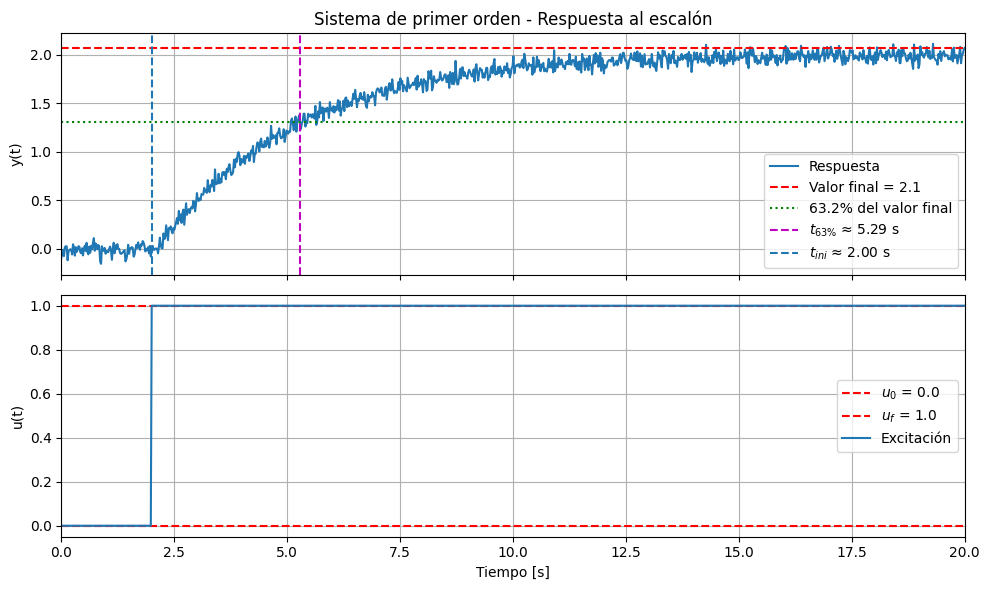

In [51]:
# Definir un sistema de primer orden: G(s) = K / (tau*s + 1)
K = 2.0      # ganancia
tau = 3.0    # constante de tiempo

s = ctrl.TransferFunction.s
G = K/((tau*s+1)*(0.05*tau*s+1))
    
# Preparo la señal de excitación
t = np.linspace(0, 20, 1000)
u = np.ones_like(t)

# Defino el instante en que entra el escalón
n_ini = 100
u[0:n_ini] = 0
t_ini = t[n_ini]  

t_out, y_out = ctrl.forced_response(G, T=t, U=u)

# Generar una versión "medida" con ruido
y_m = y_out + 0.05*np.random.randn(len(y_out))

# Valor final (ganancia estática)
y_final = y_m[-1]

# Tiempo característico (cuando alcanza 63.2% del valor final)
ytau = 0.632 * y_final
idx_tau = np.argmin(np.abs(y_m - ytau))
tau_time = t_out[idx_tau]


# Graficar
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# --- Subplot 1: respuesta ideal con anotaciones ---
axs[0].plot(t_out, y_m, label='Respuesta')
axs[0].axhline(y_final, color='r', linestyle='--', label=f'Valor final = {y_final:.1f}')
axs[0].axhline(ytau, color='g', linestyle=':', label='63.2% del valor final')
axs[0].axvline(tau_time, color='m', linestyle='--', label=f"$t_{{63\%}}$ ≈ {tau_time:.2f} s")
axs[0].axvline(t_ini, linestyle='--', label=f"$t_{{ini}}$ ≈ {t_ini:.2f} s")
axs[0].set_ylabel('y(t)')
axs[0].set_title('Sistema de primer orden - Respuesta al escalón')
axs[0].legend()
axs[0].grid(True)

# --- Subplot 2: respuesta con ruido (simulación experimental) ---
axs[1].axhline(u[0], color='r', linestyle='--', label=f'$u_0$ = {u[0]:.1f}')
axs[1].axhline(u[-1], color='r', linestyle='--', label=f'$u_f$ = {u[-1]:.1f}')
axs[1].plot(t_out, u, label='Excitación')
axs[1].set_xlabel('Tiempo [s]')
axs[1].set_ylabel('u(t)')
axs[1].legend()
axs[1].grid(True)
axs[1].set_xlim(0,t[-1])
#fig.axes[0].set_xlim

plt.tight_layout()
plt.show()


# Sistemas de polo dominante + retardo aproximado

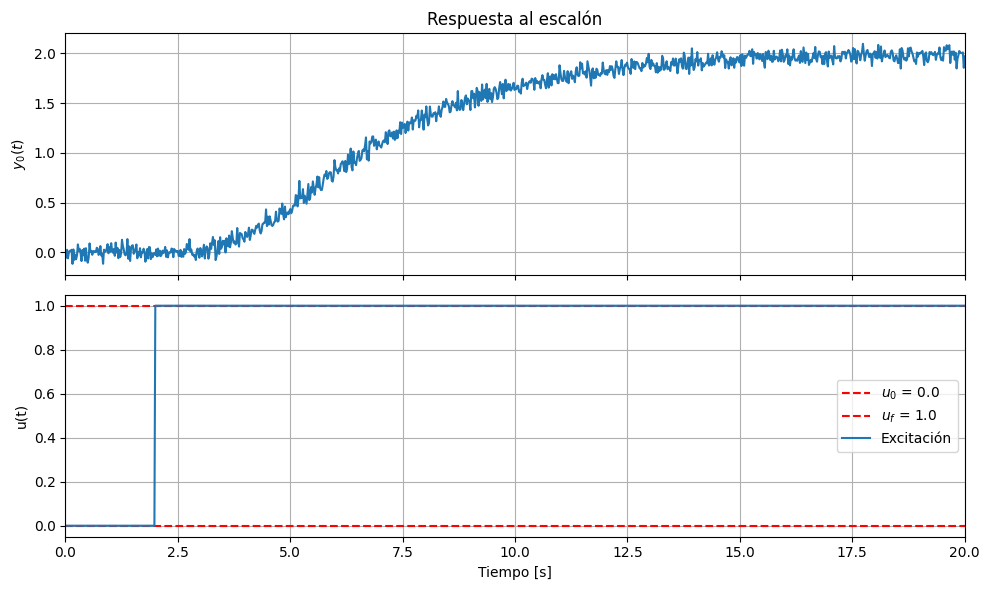

In [52]:
# Definir un sistema de primer orden: G(s) = K / (tau*s + 1)
K = 2.0      # ganancia
tau = 3.0    # constante de tiempo

Td = 1
s = ctrl.TransferFunction.s
GG = [#K/(tau*s+1)*(-s*Td+1)/(s*Td+1),
    K/((tau*s+1)*(0.2*tau*s+1)**4)
    ]

# Preparo la señal de excitación
t = np.linspace(0, 20, 1000)
u = np.ones_like(t)

# Defino el instante en que entra el escalón
n_ini = 100
u[0:n_ini] = 0
t_ini = t[n_ini]

# Graficar
fig, axs = plt.subplots(len(GG)+1, 1, figsize=(10, 6), sharex=True)

N = len(GG)
i = 0
for G in GG:    
    t_out, y_out = ctrl.forced_response(G, T=t, U=u)

    # Generar una versión "medida" con ruido
    y_m = y_out + 0.05*np.random.randn(len(y_out))

    # --- Subplot 1: respuesta ideal con anotaciones ---
    axs[i].plot(t_out, y_m)
    axs[i].grid(True)
    axs[i].set_ylabel(f'$y_{i}(t)$')

    i+=1

# --- Subplot 2: respuesta con ruido (simulación experimental) ---
axs[N].axhline(u[0], color='r', linestyle='--', label=f'$u_0$ = {u[0]:.1f}')
axs[N].axhline(u[-1], color='r', linestyle='--', label=f'$u_f$ = {u[-1]:.1f}')
axs[N].plot(t_out, u, label='Excitación')
axs[N].set_xlabel('Tiempo [s]')
axs[N].set_ylabel('u(t)')
axs[N].legend()
axs[N].grid(True)
axs[N].set_xlim(0,t[-1])

axs[0].set_title('Respuesta al escalón')

plt.tight_layout()
plt.show()


/tmp/ipykernel_91744/1988071768.py:1: RuntimeWarning: invalid value encountered in log
  zz = np.log((2-y_m) / 2)


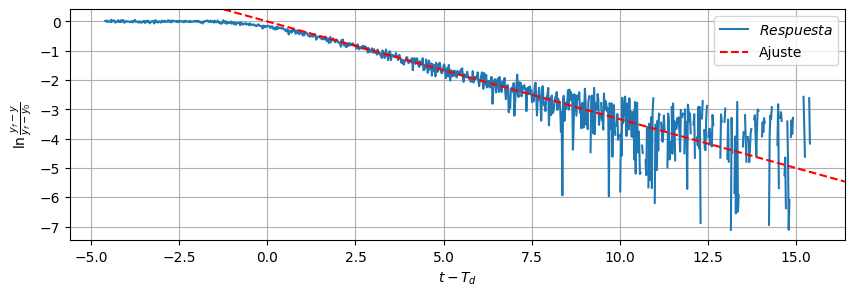

In [82]:
zz = np.log((2-y_m) / 2)
# 2.6 es el retardo estimado, el que hace coincidir la curva roja con la azul
# 2 es el tiempo inicial del escalón
tt = t-2.6-2

plt.figure(1,figsize=(10,3))
plt.plot(tt,zz,label='$Respuesta$')
plt.axline((0, 0), slope=-1/3, color='r' ,linestyle='--', label=fr'Ajuste')
plt.xlabel("$t-T_d$")
plt.ylabel('$\\ln\\frac{{y_f-y}}{{y_f-y_0}}$')
plt.legend()
plt.grid()

# Construcción del ábaco de cálculo para sistemas sobreamortiguados

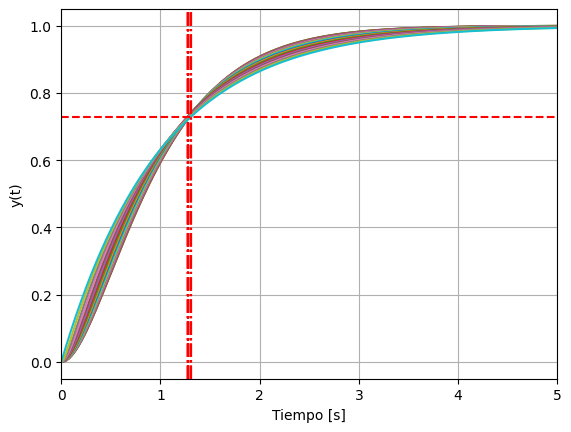

Text(0, 0.5, '$y_{{fr}}$')

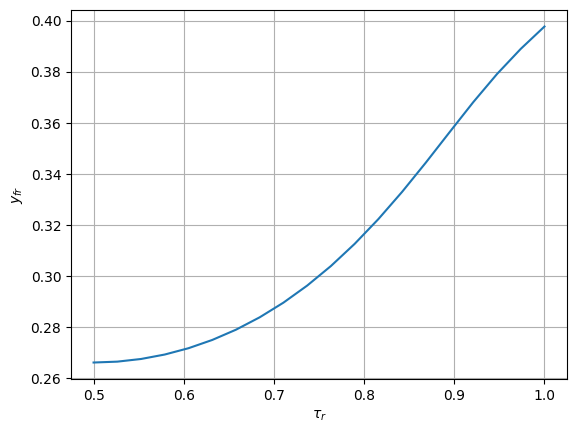

In [125]:

t = np.linspace(0,5,200)
tau_t = 1
t73 = []
yfr = []
tau_r = np.linspace(0.5,1,20)
#[0.01, 0.05, 0.1, 0.15, 0.25, 0.5]
for tau1 in tau_r*tau_t:
    tau2 = tau_t-tau1
    G = 1/((tau1*s+1)*(tau2*s+1))

    t_out, y_out = ctrl.step_response(G,T=t)
    idx = np.argmin(np.abs(y_out-0.73))
    t73.append(t_out[idx])
    plt.plot(t_out,y_out,label=f"$\\tau_1={tau1}$")
    plt.axvline(t73[-1], color='r', linestyle='-.')  

    t_prima = t_out[0] + (t73[-1]-t_out[0])/2.6
    idx = np.argmin(np.abs(t_out-t_prima))
    y_prima = y_out[idx]    
    yfr.append((y_prima-y_out[0])/(y_out[-1]-y_out[0]))  
    #tau_r.append(tau1/ tau_t)

plt.axhline(0.73, color='r', linestyle='--', label=f'$y_{{73}}$')
plt.grid()
#plt.legend()
plt.xlim(t[0],t[-1])
plt.xlabel('Tiempo [s]')
plt.ylabel('y(t)')
plt.show()

plt.figure()
plt.plot(tau_r,yfr)
plt.plot()
plt.grid()
plt.xlabel('$\\tau_r$')
plt.ylabel('$y_{{fr}}$')


20
0.2660897503042545
20
0.2660897503042545
20
0.2660897503042545


[]

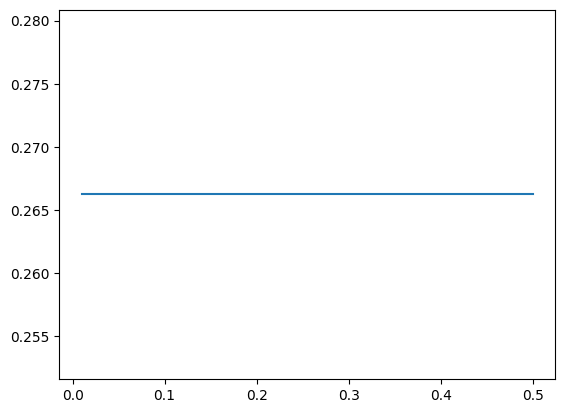